<a href="https://colab.research.google.com/github/xuandy05/Python-A.I./blob/master/Unsupervised_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**GET THE DATASET**

In [0]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
#seperate the Channel and Region column from the data frame
#Channel should be its own series, as well as Region
channel = df['Channel']
region = df['Region']

df = df.drop('Channel', 1)
df = df.drop('Region', 1)

df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**VISUALIZE THE DATA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfeb28db00>,
      dtype=object)

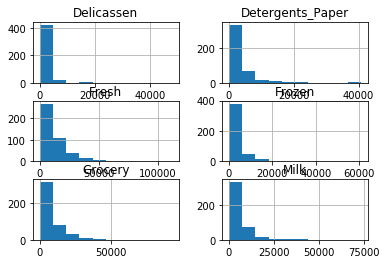

In [0]:
#plot histograms for each of the features
df.hist()

**PROCESS THE DATA**<br>


In [0]:
#remove outliers
describe = df.describe()
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for each in features:
  IQR = describe[each]['75%'] - describe[each]['25%']
  channel = channel[df[each] < describe[each]['75%'] + 1.5 * IQR]
  region = region[df[each] < describe[each]['75%'] + 1.5 * IQR]
  df = df[df[each] < describe[each]['75%'] + 1.5 * IQR]
  channel = channel[df[each] > describe[each]['25%'] - 1.5 * IQR]
  region = region[df[each] > describe[each]['25%'] - 1.5 * IQR]
  df = df[df[each] > describe[each]['25%'] - 1.5 * IQR]

df = df.reset_index(drop = True)
channel = channel.reset_index(drop = True)
region = region.reset_index(drop = True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,13265,1196,4221,6404,507,1788
3,9413,8259,5126,666,1795,1451
4,12126,3199,6975,480,3140,545
5,7579,4956,9426,1669,3321,2566
6,5963,3648,6192,425,1716,750
7,6006,11093,18881,1159,7425,2098
8,3366,5403,12974,4400,5977,1744
9,13146,1124,4523,1420,549,497


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfeb08bc50>,
      dtype=object)

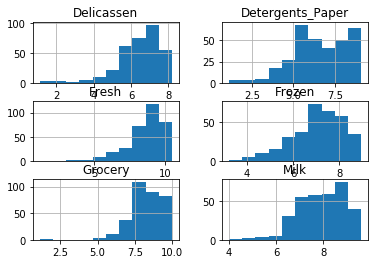

In [0]:
#normalize the distribution, by using np.log
df = np.log(df)
df.hist()

**PCA**

In [0]:
from sklearn.decomposition import PCA
#Create a PCA with 2 components
#train the PCA model
#use pca to summarize the data
#convert output back into a dataframe, the output should have only 2 features, named them Dimension 1 and Dimension 2
pca = PCA(n_components = 2)
pca.fit(df)
p = pca.transform(df)
df2 = pd.DataFrame(p, columns = ['Dimension 1', 'Dimension 2'])
df2

,Dimension 1,Dimension 2
0,-1.962125,-0.738819
1,-1.996034,-1.297264
2,0.932824,-1.698350
3,-1.290974,-0.895798
4,-1.403927,-0.410627
5,-1.779801,-1.419090
6,-1.145378,0.057751
7,-3.090159,-1.262119
8,-2.348890,-1.089456
9,0.725698,-0.469277


**kMeans Clustering**

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Create the KMeans model with any number of clusters. The only input is number of cluster centers
#train the model with .fit
#create predictions with .predict
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df2)
pred = kmeans.predict(df2)
#Use silhouette_score to evaluate the performance of the model.
#silhouette_score is ranges from -1 to 1
#1 is the best, 0 indicates overlapping clusters, -1 indicates that points have been assigned to the wrong cluster
score = silhouette_score(df2, pred, metric='euclidean')

***Improving the Model***

In [0]:
# Find the optimal number of clusters. Use silhouette_score to evaluate the performance of the model
# Use a loop to train the KMeans model with different number of clusters
best_score = -1
optimal = 0
for i in range(2, 10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df2)
  pred = kmeans.predict(df2)
  score = silhouette_score(df2, pred, metric='euclidean')
  if score > best_score:
    best_score = score
    optimal = i
print("The optimal number of clusters is", optimal, "with a score of", best_score)
kmeans = KMeans(n_clusters = optimal)
kmeans.fit(df2)
pred = kmeans.predict(df2)

The optimal number of clusters is 2 with a score of 0.43735571911196996


**Checking you answer**

Text(0, 0.5, 'Dimension 2')

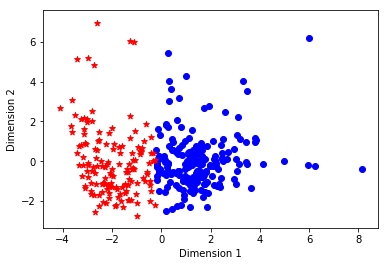

In [0]:
# plot the data points with the predicted labels
p1 = df2[pred == 0]
p2 = df2[pred == 1]
plt.scatter(p1['Dimension 1'], p1['Dimension 2'], color = 'b', marker = 'o')
plt.scatter(p2['Dimension 1'], p2['Dimension 2'], color = 'r', marker = '*')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

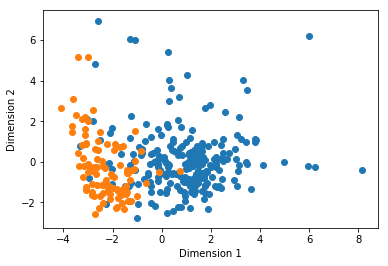

In [0]:
# plot the data points with the actual labels for Channel
plt.scatter(df2[channel == 1]['Dimension 1'], df2[channel == 1]['Dimension 2'])
plt.scatter(df2[channel == 2]['Dimension 1'], df2[channel == 2]['Dimension 2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

Text(0, 0.5, 'Dimension 2')

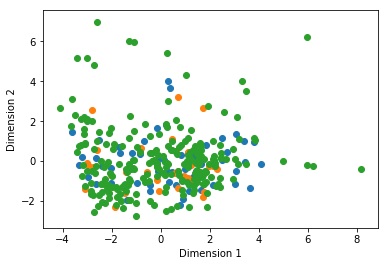

In [0]:
# plot the data points with the actual labels for Region
plt.scatter(df2[region == 1]['Dimension 1'], df2[region == 1]['Dimension 2'])
plt.scatter(df2[region == 2]['Dimension 1'], df2[region == 2]['Dimension 2'])
plt.scatter(df2[region == 3]['Dimension 1'], df2[region == 3]['Dimension 2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')